# Assignment 1: Primitive Sensitivity Analysis
#### Moritz Kick, Rami El Immam, Maximilian Nowak

In [1]:
# Import modules from source
import os, sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display

from assignment1.seir import seir_model, seirc_model, G1, G2
from assignment1 import utils

from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
assignment1 NA
ipywidgets  8.0.4
matplotlib  3.6.2
numpy       1.23.5
scipy       1.10.0
sinfo       0.3.4
-----
IPython             8.10.0
jupyter_client      7.4.9
jupyter_core        5.2.0
jupyterlab          3.5.3
notebook            6.5.4
-----
Python 3.11.0 (main, Mar  1 2023, 18:26:19) [GCC 11.2.0]
Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31
8 logical CPU cores, x86_64
-----
Session information updated at 2023-05-26 23:49


## Implementation of the model
### 1. Implement SEIR model

In [14]:

beta = 14/9  # infection rate
alpha = 7/3  # incubation rate
gamma = 7/9  # recovery rate
i0 = 1000  # initial number of infected individuals

# Define initial conditions
N = 80e6
S0 = N - i0
E0 = 0
I0 = i0
R0 = 0
y0 = [S0, E0, I0, R0]

# Define time points (60 Weeks)
t = np.linspace(0, 60, 61)

x0 = (beta, alpha, gamma, N)
y0 = S0, E0, I0, R0

### 2. & 3. Plot and play with the parameters

In [15]:
# Define sliders for parameters
beta_slider = widgets.FloatSlider(
    value=beta, min=0.0, max=5.0, step=0.01, description='beta:')
alpha_slider = widgets.FloatSlider(
    value=alpha, min=0.0, max=5.0, step=0.01, description='alpha:')
gamma_slider = widgets.FloatSlider(
    value=gamma, min=0.0, max=5.0, step=0.01, description='gamma:')
i0_slider = widgets.IntSlider(
    value=i0, min=0, max=N, step=1e3, description='i0:')

# Define a function to update the plot
def update_plot(beta, alpha, gamma, i0):
    x0 = (beta, alpha, gamma, N)
    y0 = S0, E0, i0, R0
    sol = seir_model(x0).solve(t, y0)
    S, E, I, R = sol.T
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, E, 'r', label='Exposed')
    plt.plot(t, I, 'g', label='Infected')
    plt.plot(t, R, 'm', label='Recovered')
    plt.title('SEIR Model')
    plt.xlabel('Time (weeks)')
    plt.ylabel('Population')
    plt.legend()
    plt.show()


# Display the plot and sliders
interactive_plot = widgets.interactive(
    update_plot, beta=beta_slider, alpha=alpha_slider, gamma=gamma_slider, i0=i0_slider)
output = interactive_plot.children[-1]
output.layout.height = '350px'
display(interactive_plot)


interactive(children=(FloatSlider(value=1.5555555555555556, description='beta:', max=5.0, step=0.01), FloatSli…

### 5./6./7. Include C(t), C0 = C(0) and plot the curve

In [13]:
# include curve for cumulative cases C(t)

# passing on additional value for C in y0 extends model to SEIRC
C0 = I0
y0 = [S0, E0, I0, R0, C0]


def update_plot(beta, alpha, gamma, i0):
    x0 = (beta, alpha, gamma, N)
    y0 = S0, E0, i0, R0, C0
    sol = seirc_model(x0).solve(t, y0)
    S, E, I, R, C = sol.T
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, E, 'r', label='Exposed')
    plt.plot(t, I, 'g', label='Infected')
    plt.plot(t, R, 'm', label='Recovered')
    plt.plot(t, C, 'c', label='Cumulative cases')
    plt.title('SEIRC Model')
    plt.xlabel('Time (weeks)')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

interactive_plot = widgets.interactive(
    update_plot, beta=beta_slider, alpha=alpha_slider, gamma=gamma_slider, i0=i0_slider)
output = interactive_plot.children[-1]
output.layout.height = '350px'
display(interactive_plot)


interactive(children=(FloatSlider(value=0.84, description='beta:', max=5.0, step=0.01), FloatSlider(value=1.89…

### 8. Sample data (perturbations=[5 %, 10 %], N=10^3)

In [6]:
# model parameters
N = 80e6
beta = 14/9
alpha = 7/3
gamma = 7/9

# inital conditions
I0 = 1000
S0 = N-I0
E0 = 0
R0 = 0
C0 = I0

# simulation time
T = 60
t = np.linspace(0, T, T+1)

x0 = (beta, alpha, gamma, N)
y0 = S0, E0, I0, R0, C0

utils.run_simulations(seirc_model, x0, y0, t, 0.05, 1000)
utils.run_simulations(seirc_model, x0, y0, t, 0.10, 1000)

### 9. Plot empirical distribution of C(t, x)

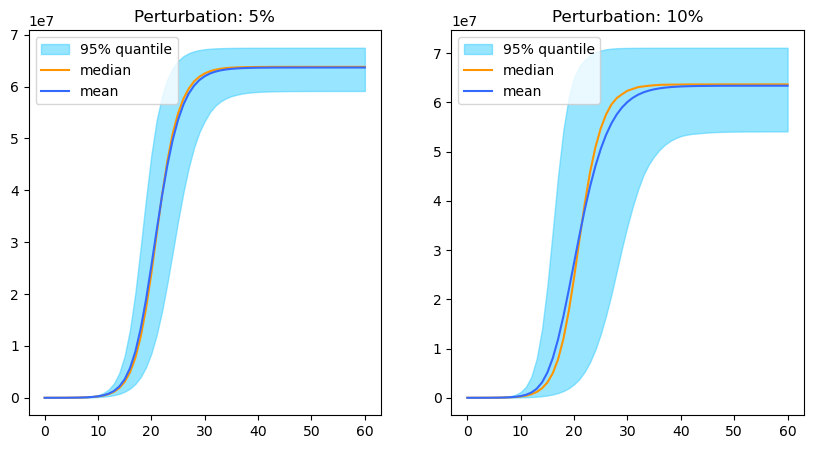

In [7]:
# load data and retrieve metrics
C_data5 = np.loadtxt(utils.config['datadir'] + "/C_data_5")
metrics5 = utils.get_metrics(C_data5)

C_data10 = np.loadtxt(utils.config['datadir'] + "/C_data_10")
metrics10 = utils.get_metrics(C_data10)

# plot data for C and I 
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].fill_between(t, metrics5[2], metrics5[3], color="#33ccff", alpha=0.5, label='95% quantile')
ax[0].plot(t, metrics5[1], label='median', color='#ff9600')
ax[0].plot(t, metrics5[0], label='mean', color='#3369ff')
ax[0].set_title("Perturbation: 5%")
ax[0].legend()
ax[1].fill_between(t, metrics10[2], metrics10[3], color="#33ccff", alpha=0.5, label='95% quantile')
ax[1].plot(t, metrics10[1], label='median', color='#ff9600')
ax[1].plot(t, metrics10[0], label='mean', color='#3369ff')
ax[1].set_title("Perturbation: 10%")
ax[1].legend()
plt.show()

### 10. Empirical distribution of G1 and G2(X)

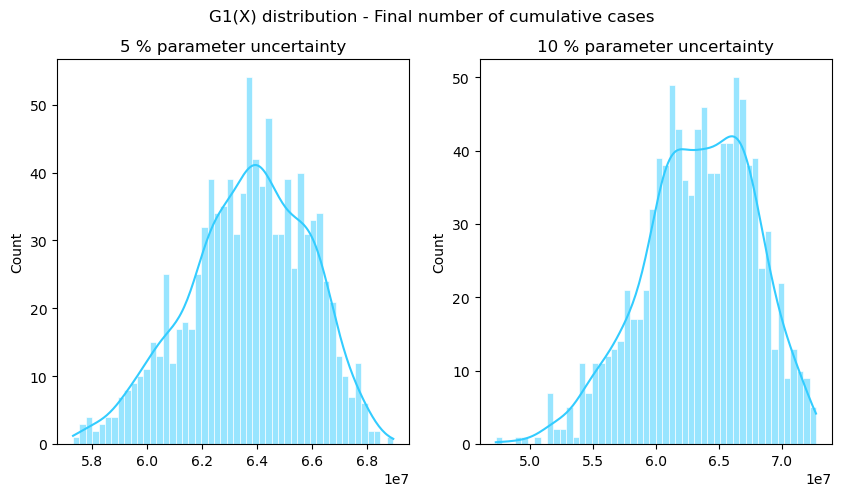

In [8]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('G1(X) distribution - Final number of cumulative cases\n')

ax[0].set_title('5 % parameter uncertainty')
sns.histplot(ax=ax[0], data=G1(C_data5), color="#33ccff", edgecolor = "white", kde=True, bins=50)

ax[1].set_title('10 % parameter uncertainty')
sns.histplot(ax=ax[1], data=G1(C_data10), color="#33ccff", edgecolor = "white", kde=True, bins=50)

plt.show()

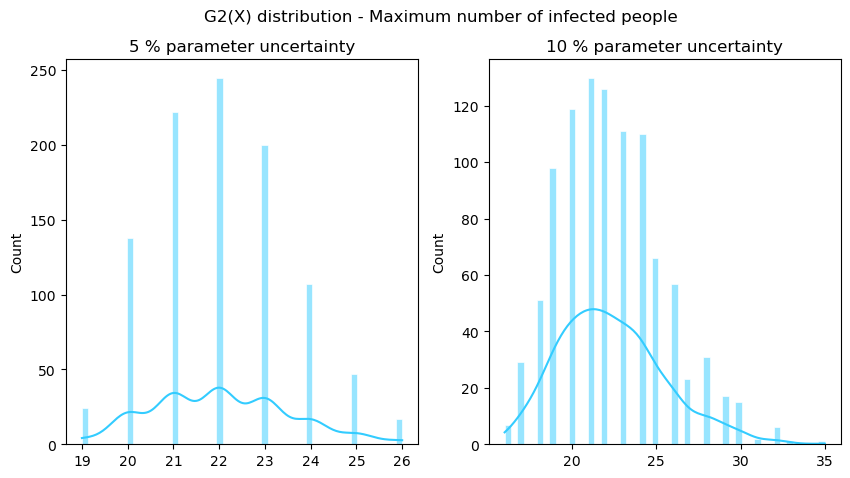

In [13]:
I_data5 = np.loadtxt(utils.config['datadir'] + "/I_data_5")
I_data10 = np.loadtxt(utils.config['datadir'] + "/I_data_10")

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('G2(X) distribution - Maximum number of infected people')

ax[0].set_title('5 % parameter uncertainty')
sns.histplot(ax=ax[0], data=G2(I_data5, t), color="#33ccff", edgecolor = "white", kde=True, bins=50)

ax[1].set_title('10 % parameter uncertainty')
sns.histplot(ax=ax[1], data=G2(I_data10, t), color="#33ccff", edgecolor = "white", kde=True, bins=50)

plt.show()

### 11. Empirical quantile intervals of $G_1(X)$ and $G_2(X)$

In [10]:
for s, op, data5, data10 in [("G1(X)", G1, C_data5, C_data10)]:
    high_quant5 = np.quantile(op(data5), 0.975)
    low_quant5 = np.quantile(op(data5), 0.025)

    high_quant10 = np.quantile(op(data10), 0.975)
    low_quant10 = np.quantile(op(data10), 0.025)
    
    print(s + " 5%%: [%f, %f]" % (low_quant5, high_quant5))
    print(s+ " 10%%: [%f, %f]" % (low_quant10, high_quant10))
    
for s, op, t, data5, data10 in [("G2(X)", G2, t, I_data5, I_data10)]:
    high_quant5 = np.quantile(op(data5, t), 0.975)
    low_quant5 = np.quantile(op(data5, t), 0.025)

    high_quant10 = np.quantile(op(data10, t), 0.975)
    low_quant10 = np.quantile(op(data10, t), 0.025)
    
    print(s + " 5%%: [%f, %f]" % (low_quant5, high_quant5))
    print(s+ " 10%%: [%f, %f]" % (low_quant10, high_quant10))

G1(X) 5%: [59153796.547989, 67486622.598252]
G1(X) 10%: [54120565.846123, 71109170.693677]
G2(X) 5%: [20.000000, 25.000000]
G2(X) 10%: [17.000000, 29.025000]


### 12. Pearson Correlation

#### Coefficient matrix of G1(X) and G2(x) with 5 % perturbation

In [11]:
np.corrcoef(G1(C_data5), G2(I_data5, t))

array([[ 1.        , -0.94440736],
       [-0.94440736,  1.        ]])

#### Coefficient matrix of G1(X) and G2(X) with 10 % perturbation

In [12]:
np.corrcoef(G1(C_data10), G2(I_data10, t))

array([[ 1.        , -0.95758785],
       [-0.95758785,  1.        ]])